<div align="center">

# Music Mood Analysis
### CS 418 - Team 11
#### Conrad Domagala, Juan Cruz, Tyler Strach, Ceasar Attar, Rovia Simmons, Andrea Carbonati
##### Github project repository: https://github.com/cs418-fa24/project-check-in-team-11

</div>

## Project Introduction
Our project aims to understand the spotify song classification/reccomendation algorithm and to see if it can be accurately recreated. Through gathering songs and their respective specific statistics from Spotify, we will determine what aspects of songs does Spotify use the most to determine the mood classification of songs. In turn, we will then evaluate whether or not an overall mood can be determined accurately from a user's liked songs library.

## Scope Adjustments
We wanted to try and recreate the Spotify wrapped, however that was a large scope and more tailored towards recreating a listening profile based on other non-song related data such as listening history, time of day, and artist preference. We pivoted the scope to focus on song related data such as track features revolving around tempo, loudness, energy, danceability, etc.

## Data Collection and Cleaning
This script uses the Spotify API to retrieve a user's saved (liked) tracks, along with their audio features, such as acousticness, danceability, energy, and tempo. The data is then processed and stored in a JSON file for further analysis. This information serves as a foundation for understanding mood classification based on Spotify's track features.

### Retrieve Liked Songs from Spotify

This script retrieves a user's liked (saved) songs from Spotify along with their audio features (e.g., tempo, energy, danceability). The data is then stored in a JSON file for further analysis.

#### Steps to Use This Script
1. **Set Up Spotify API Credentials**:  
   - Register a Spotify Developer account and create an app to get your `CLIENT_ID`, `CLIENT_SECRET`, and `REDIRECT_URI`.
   - Replace the placeholders in the script with these values.

2. **Authorize Spotify Access**:  
   - The script uses SpotifyOAuth to authenticate and access the user's private playlists.

3. **Retrieve Liked Songs**:  
   - The script fetches the user's saved tracks along with their audio features such as acousticness, energy, loudness, and tempo.

4. **Save Data**:  
   - The song data is saved into a JSON file for later use. Ensure to rename the file as necessary to avoid overwriting.

#### Purpose
The retrieved liked songs and their features provide a dataset that can be analyzed to understand how certain attributes contribute to mood classification.


In [ ]:
import json

import spotipy
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

# Get the user's liked songs
results = sp.current_user_saved_tracks()
liked_songs = []

while results:
    for item in results['items']:
        track = item['track']
        features = sp1.audio_features(track['id'])[0]
        liked_songs.append({
            'name': track['name'],
            'id': track['id'],
            'acousticness': features['acousticness'],
            'danceability': features['danceability'],
            'duration_ms': features['duration_ms'],
            'energy': features['energy'],
            'instrumentalness': features['instrumentalness'],
            'key': features['key'],
            'liveness': features['liveness'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'valence': features['valence']
        })

    results = sp.next(results)

#TODO rename the file so that it does not overwrite anyone else's
with open('/Users/conrad/dev-school/418/final-project/raw/liked_songs_1.json', 'w') as json_file:
    json.dump(liked_songs, json_file, indent=4)


### Retrieve Spotify-Generated Playlists for Each Mood (Happy, Sad, Chill, Energetic)

This script retrieves Spotify playlists curated for specific moods (Happy, Sad, Chill, and Energetic) and extracts their audio features (e.g., tempo, danceability, valence). The data is stored in JSON files for further analysis.

#### Steps to Use This Script
1. **Set Up Spotify API Credentials**:  
   - Register a Spotify Developer account and create an app to get your `CLIENT_ID`, `CLIENT_SECRET`, and `REDIRECT_URI`.
   - Replace the placeholders in the script with these values.

2. **Prepare Mood Playlists**:  
   - Locate your "Mood Mix" playlists on Spotify (Happy, Sad, Chill, Energetic).  
   - Use the Spotify app to click the "..." menu and add each playlist to a new custom playlist (e.g., "Happy Mix (2)").  
   - Repeat this for all moods to ensure the playlists are accessible for the script.

3. **Run the Script**:  
   - The script fetches each playlist's tracks and their associated audio features, such as loudness, energy, and tempo.  
   - The data is saved to individual JSON files for each mood.

4. **Save the Data**:  
   - Make sure to rename the JSON files (e.g., `spotify_happy_1.json`) to avoid overwriting data.

#### Purpose
The curated mood-based playlists provide distinct datasets for analyzing song attributes that contribute to mood classification. This data serves as a foundation for training machine learning models.


In [ ]:
import json
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# TODO insert info same as library.py...
CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

for mood, p_id in moods.items():
    results = sp.playlist_items(p_id)
    tracks = []

    while results:
        for item in results['items']:
            track = item['track']
            features = sp1.audio_features(track['id'])[0]

            if features is None:
                continue

            tracks.append({
                'name': track['name'],
                'id': track['id'],
                'acousticness': features['acousticness'],
                'danceability': features['danceability'],
                'duration_ms': features['duration_ms'],
                'energy': features['energy'],
                'instrumentalness': features['instrumentalness'],
                'key': features['key'],
                'liveness': features['liveness'],
                'loudness': features['loudness'],
                'mode': features['mode'],
                'speechiness': features['speechiness'],
                'tempo': features['tempo'],
                'time_signature': features['time_signature'],
                'valence': features['valence']
            })
        print("mood complete")
        # get next set of tracks
        results = sp.next(results)

    #TODO make sure to enter the number corresponding to your data
    num = 1
    with open(f'spotify_{mood.lower()}_{num}.json', 'w') as file:
        json.dump(tracks, file, indent=4)

    file.close()


### Combine and Process Mood-Based Data into Dataframe

This script combines data from multiple JSON files containing Spotify mood-based playlists (Happy, Sad, Chill, Energetic) into a single dataset. It processes the data by assigning each song a corresponding mood label and dropping unnecessary columns.

#### Steps to Use This Script
1. **Prepare JSON Files**:  
   - Ensure the JSON files for each mood (e.g., `spotify_happy_1.json`, `spotify_sad_1.json`) are stored in the specified `./raw/` directory.  
   - Each mood should have multiple files named sequentially (e.g., `spotify_happy_1.json`, `spotify_happy_2.json`).

2. **Load and Label Data**:  
   - The script iterates through all JSON files for each mood.  
   - It reads the data into Pandas DataFrames and assigns a `mood` label (e.g., `happy`, `sad`) to every song.

3. **Combine Data**:  
   - All individual DataFrames are concatenated into a single DataFrame (`final_df`) for easier analysis and visualization.

4. **Process Data**:  
   - Unnecessary columns like `name` and `id` are dropped to retain only relevant audio features for analysis.

#### Purpose
This combined and processed dataset serves as the input for data exploration and machine learning models, enabling the identification of patterns and relationships between song attributes and mood classifications.


In [2]:
import json
import pandas as pd

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)


final_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

## Data Exploration
Our project's data consists of multiple JSON files, each representing different sets of Spotify songs categorized by moods such as chill, energetic, happy, and sad, along with a separate collection of liked songs from personal user libraries. These files contain attributes that are important in understanding song characteristics which may influence their mood classification, such as tempo, loudness, energy, danceability, and others.

In our preliminary analysis, we explored how these attributes distribute across various playlists to hypothesize which features might be most influential in determining a song's mood. We encountered significant challenges due to the size of the data files and API rate limits.

Interestingly, initial visualizations suggest clear distinctions in certain attributes among different mood-based playlists; for instance, songs in the happy playlist tend to have higher valence and tempo compared to those in the sad playlist. This aligns with our objective to differentiate between the patterns that could potentially recreate Spotify's mood classification logic. Moving forward, we plan to apply statistical tests to confirm these observations and refine our models accordingly, aiming to predict mood classifications with high accuracy.

In [3]:
import pandas as pd
import json
import numpy as np

dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

liked_songs_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
liked_songs_df = liked_songs_df.drop(columns=drop)

#liked_songs_df.head(5)
liked_songs_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2784.000000,2784.000000,2784.00000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,0.264226,0.673031,216885.16056,0.602474,0.181876,5.345905,0.179052,-8.239840,0.544181,0.126167,118.323834,3.953305,0.527378
std,0.272244,0.159629,78603.04152,0.187366,0.321257,3.696630,0.137154,3.638828,0.498134,0.122564,27.905911,0.334789,0.240315
min,0.000003,0.000000,15967.00000,0.008580,0.000000,0.000000,0.019000,-36.856000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043000,0.580000,167217.75000,0.483000,0.000000,2.000000,0.096400,-9.776250,0.000000,0.040400,96.051000,4.000000,0.344750
50%,0.160500,0.700000,206033.50000,0.616000,0.000096,5.000000,0.124000,-7.587000,1.000000,0.068300,117.046000,4.000000,0.533000
75%,0.428000,0.787250,253346.50000,0.738000,0.194000,9.000000,0.217250,-5.858500,1.000000,0.182000,136.008750,4.000000,0.724000
max,0.996000,0.978000,828560.00000,0.996000,0.973000,11.000000,0.983000,3.025000,1.000000,0.918000,215.449000,5.000000,0.981000


### Visualizing Feature Distributions Across Moods

This script generates a radar plot to compare the average values of various audio features (e.g., acousticness, energy, danceability) across moods like Happy, Sad, Chill, and Energetic. By normalizing and visualizing these features, the plot highlights distinct patterns in song characteristics that define each mood, helping in understanding how attributes contribute to mood classification.


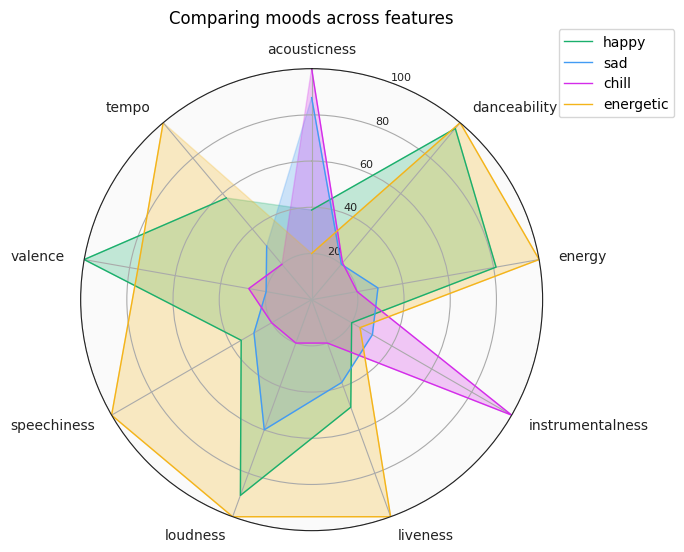

In [4]:
import matplotlib.pyplot as plt

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)

moods_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
moods_df = moods_df.drop(columns=drop)

moods_mean_df = moods_df.groupby('mood').mean()


factors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

new_max = 100
new_min = 20
new_range = new_max - new_min

for factor in factors:
    max_val = moods_mean_df[factor].max()
    min_val = moods_mean_df[factor].min()
    val_range = max_val - min_val
    moods_mean_df[factor + '_Adj'] = moods_mean_df[factor].apply(
        lambda x: (((x - min_val) * new_range) / val_range) + new_min)
    
moods_mean_df = moods_mean_df.reset_index()
 
dft = moods_mean_df.loc[:, ['mood', 'acousticness_Adj', 'danceability_Adj', 'energy_Adj',
                             'instrumentalness_Adj', 'liveness_Adj', 'loudness_Adj', 'speechiness_Adj',
                             'valence_Adj', 'tempo_Adj']]
dft.rename(columns={
    'acousticness_Adj': 'acousticness',
    'danceability_Adj': 'danceability',
    'energy_Adj': 'energy',
    'instrumentalness_Adj': 'instrumentalness',
    'liveness_Adj': 'liveness',
    'loudness_Adj': 'loudness',
    'speechiness_Adj': 'speechiness',
    'valence_Adj': 'valence',
    'tempo_Adj': 'tempo'
}, inplace=True)

dft.set_index('mood', inplace=True)

labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_to_radar(mood, color):
    values = dft.loc[mood].tolist()
    ax.plot(angles, values, color=color, linewidth=1, label=mood)
    ax.fill(angles, values, color=color, alpha=0.25)

add_to_radar('happy', '#1aaf6c')
add_to_radar('sad', '#429bf4')
add_to_radar('chill', '#d42cea')
add_to_radar('energetic', '#f4b41a')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

ax.set_ylim(0, 100)
ax.set_rlabel_position(180 / num_vars)

ax.tick_params(colors='#222222')
ax.tick_params(axis='y', labelsize=8)
ax.grid(color='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')

ax.set_title('Comparing moods across features', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


### Mood-Specific Data Findings

The following sections display statistical summaries of audio features for songs in each mood category (Happy, Sad, Chill). These summaries include metrics like mean, standard deviation, and min/max values for features such as acousticness, danceability, energy, and more. These insights help identify unique trends and patterns for each mood.


#### Happy Songs
- High **danceability** (0.699) and **energy** (0.675) reflect lively, upbeat tracks.
- Positive emotional tone with a mean **valence** of 0.703.
- Low **acousticness** (0.228) suggests less acoustic, more electronic sound.


In [6]:
happy_df = moods_df[moods_df['mood'] == 'happy']
happy_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.228003,0.699980,194467.153333,0.675430,0.050095,5.266667,0.173191,-6.669817,0.650000,0.076948,119.553113,3.980000,0.703342
std,0.221277,0.115443,45106.245635,0.147835,0.169320,3.488474,0.147277,2.635357,0.477767,0.086437,24.054849,0.230457,0.191693
min,0.000038,0.197000,60942.000000,0.166000,0.000000,0.000000,0.024600,-22.602000,0.000000,0.026300,68.837000,1.000000,0.064600
25%,0.042775,0.633000,169783.000000,0.567000,0.000000,2.000000,0.085575,-7.986250,0.000000,0.036675,103.655750,4.000000,0.550750
50%,0.165000,0.712000,197575.000000,0.683000,0.000007,5.000000,0.113000,-6.220500,1.000000,0.045950,117.684000,4.000000,0.738000
75%,0.352750,0.780250,218013.000000,0.791000,0.001670,8.250000,0.209500,-4.873250,1.000000,0.077675,129.292500,4.000000,0.860000
max,0.972000,0.935000,473013.000000,0.991000,0.978000,11.000000,0.955000,-1.931000,1.000000,0.711000,209.688000,5.000000,0.981000


#### Sad Songs
- High **acousticness** (0.523) indicates more acoustic elements.
- Lower **energy** (0.433) and **valence** (0.324) align with somber tones.
- Moderate **tempo** (114 BPM) supports reflective moods.

In [7]:
sad_df = moods_df[moods_df['mood'] == 'sad']
sad_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.522723,0.558353,199938.663333,0.432511,0.131883,5.366667,0.161904,-9.853107,0.690000,0.071891,114.860097,3.860000,0.324138
std,0.338082,0.150576,55978.912548,0.204289,0.277139,3.531827,0.119905,3.796737,0.463266,0.092606,30.075703,0.477311,0.189012
min,0.000008,0.174000,57370.000000,0.014800,0.000000,0.000000,0.051100,-27.117000,0.000000,0.024700,59.981000,1.000000,0.034100
25%,0.159000,0.457000,161423.000000,0.286750,0.000000,2.000000,0.101000,-12.072500,0.000000,0.031500,88.491750,4.000000,0.180000
50%,0.609500,0.556500,200738.000000,0.415000,0.000310,5.000000,0.115000,-9.313000,1.000000,0.041000,113.983000,4.000000,0.295500
75%,0.830000,0.669000,237807.000000,0.571250,0.038100,8.000000,0.167000,-7.115250,1.000000,0.062625,133.993500,4.000000,0.432750
max,0.989000,0.946000,400560.000000,0.941000,0.962000,11.000000,0.938000,-2.810000,1.000000,0.777000,220.099000,5.000000,0.961000


#### Chill Songs
- High **acousticness** (0.599) and **instrumentalness** (0.681) create a calm, laid-back vibe.
- Lower **energy** (0.390) and softer **loudness** (-14.06 dB).
- Tracks favor acoustic and instrumental arrangements.

In [8]:
chill_df = moods_df[moods_df['mood'] == 'chill']
# chill_df.head(5)
chill_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,298.000000,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.598625,0.559860,1.895219e+05,0.389692,0.681035,5.211409,0.143961,-14.062195,0.617450,0.064918,113.081587,3.838926,0.360358
std,0.345235,0.194147,9.815156e+04,0.230500,0.350116,3.524652,0.097558,6.789103,0.486827,0.061753,33.388542,0.569330,0.253110
min,0.002110,0.000000,5.460000e+04,0.005580,0.000000,0.000000,0.050100,-32.838000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258250,0.441000,1.352610e+05,0.192000,0.540750,2.000000,0.096925,-16.510750,0.000000,0.035800,86.981500,4.000000,0.142000
50%,0.665000,0.585000,1.735805e+05,0.402000,0.868000,5.000000,0.111000,-12.035000,1.000000,0.043100,111.525500,4.000000,0.313500
75%,0.936750,0.702000,2.189665e+05,0.563750,0.918000,8.000000,0.142750,-9.093500,1.000000,0.060700,135.294750,4.000000,0.538750
max,0.996000,0.944000,1.020000e+06,0.876000,0.983000,11.000000,0.644000,-2.851000,1.000000,0.425000,216.542000,5.000000,0.979000


#### Energetic Songs
- High **energy** (0.764) and **tempo** (126 BPM) reflect vibrant, fast-paced tracks.
- Low **acousticness** (0.114) suggests digitally produced sounds.
- Uplifting tone with high **danceability** (0.706) and **valence** (0.591).

In [9]:
energetic_df = moods_df[moods_df['mood'] == 'energetic']
energetic_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.00000,300.000000,300.000000,300.000000,300.000000
mean,0.114087,0.70598,188854.886667,0.763937,0.083261,5.326667,0.223101,-5.63511,0.54000,0.128178,126.900030,3.993333,0.591366
std,0.163824,0.12925,57081.588246,0.139076,0.222798,3.741651,0.192518,2.11770,0.49923,0.118072,22.628471,0.141500,0.236231
min,0.000090,0.30500,87076.000000,0.305000,0.000000,0.000000,0.024500,-13.55500,0.00000,0.026600,75.142000,3.000000,0.038500
25%,0.009573,0.62950,150003.250000,0.676000,0.000000,1.000000,0.101750,-7.12600,0.00000,0.044925,112.960000,4.000000,0.417500
50%,0.041650,0.71850,185577.000000,0.784500,0.000003,5.000000,0.147000,-5.42800,1.00000,0.074350,126.029000,4.000000,0.616500
75%,0.150000,0.79200,215349.750000,0.872500,0.002873,9.000000,0.288500,-4.26300,1.00000,0.196250,140.318750,4.000000,0.779000
max,0.841000,0.95700,428048.000000,0.998000,0.938000,11.000000,0.983000,0.32800,1.00000,0.918000,198.035000,5.000000,0.970000


## Data Visualization
Our hypothesis is that certain song attributes are more prevalent in specific moods. To test this hypothesis, we visualized the distribution of song attributes across different moods. We focused on the following attributes: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence and tempo.

<Axes: xlabel='instrumentalness', ylabel='mood'>

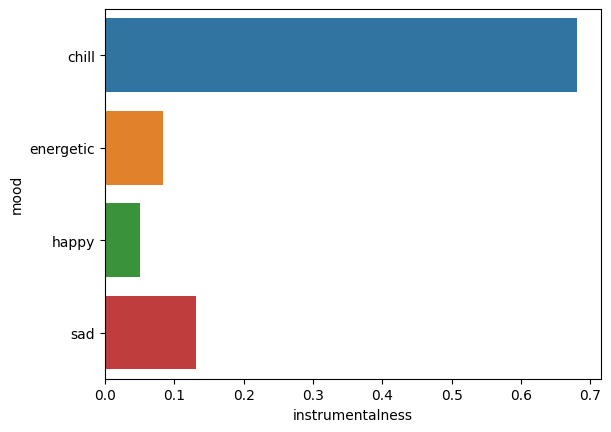

In [10]:
import seaborn as sns

moods_mean_df = moods_df.groupby('mood').mean()
sns.barplot(moods_mean_df, x="instrumentalness", y="mood", hue="mood", legend=False)

<Axes: xlabel='valence', ylabel='mood'>

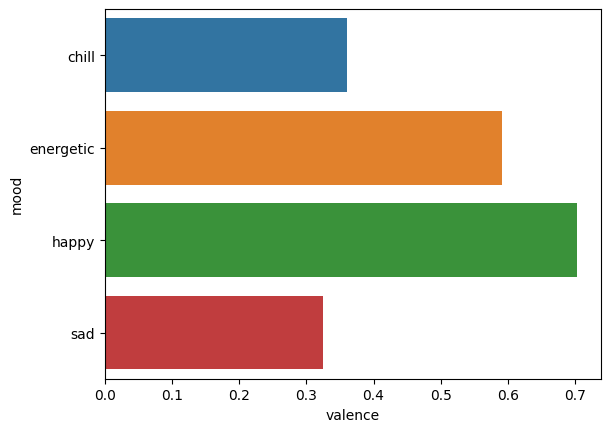

In [37]:
sns.barplot(moods_mean_df, x="valence", y="mood", hue="mood", legend=False)

<Axes: xlabel='speechiness', ylabel='mood'>

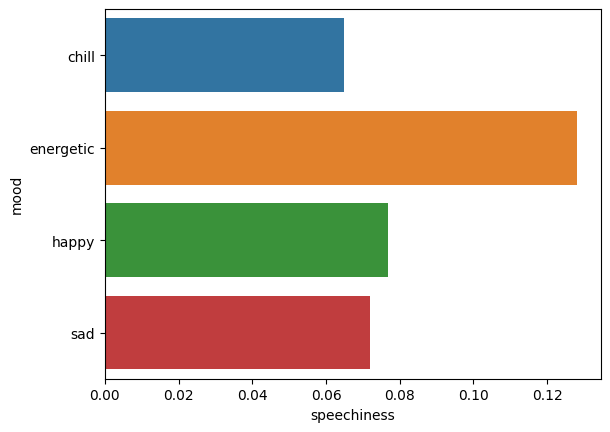

In [38]:
sns.barplot(moods_mean_df, x="speechiness", y="mood", hue="mood", legend=False)

<Axes: xlabel='danceability', ylabel='mood'>

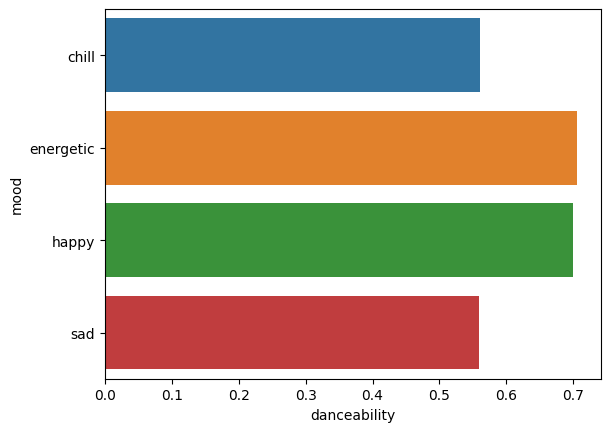

In [39]:
sns.barplot(moods_mean_df, x="danceability", y="mood", hue="mood", legend=False)

<Axes: xlabel='energy', ylabel='mood'>

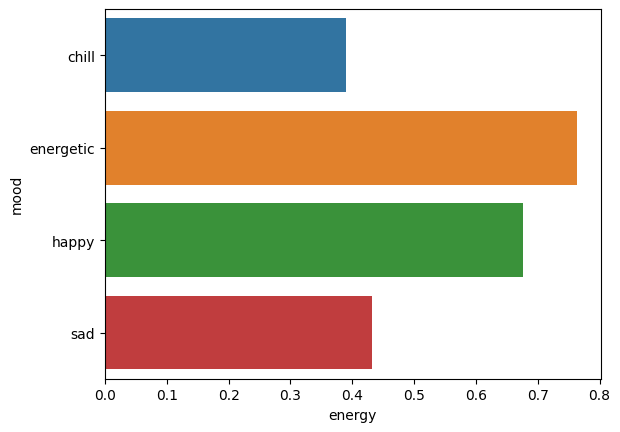

In [40]:
sns.barplot(moods_mean_df, x="energy", y="mood", hue="mood", legend=False)

<Axes: xlabel='tempo', ylabel='mood'>

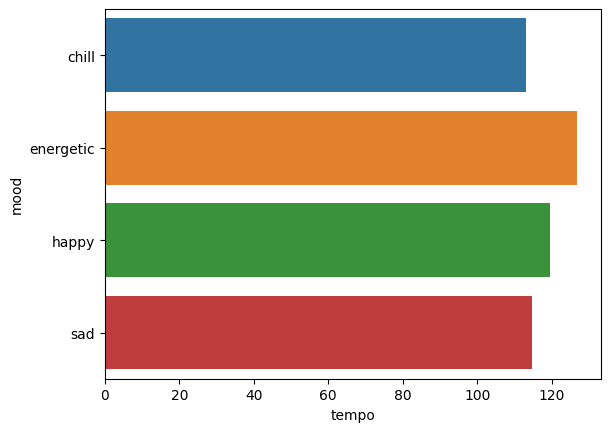

In [41]:
sns.barplot(moods_mean_df, x="tempo", y="mood", hue="mood", legend=False)

<Axes: xlabel='loudness', ylabel='mood'>

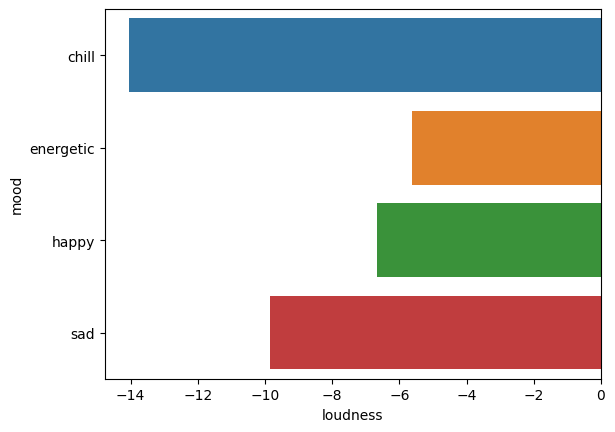

In [42]:
sns.barplot(moods_mean_df, x="loudness", y="mood", hue="mood", legend=False)

<Axes: xlabel='liveness', ylabel='mood'>

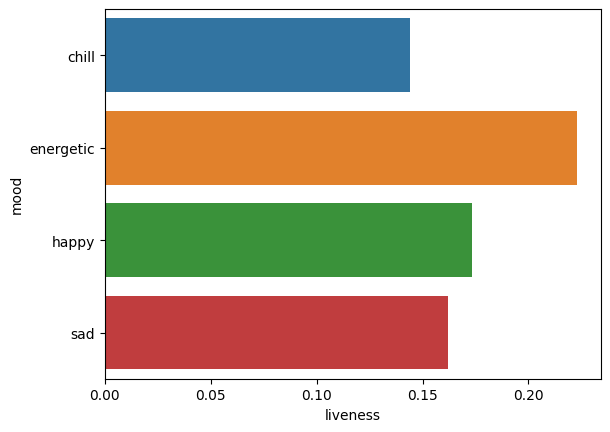

In [43]:
sns.barplot(moods_mean_df, x="liveness", y="mood", hue="mood", legend=False)

<Axes: xlabel='acousticness', ylabel='mood'>

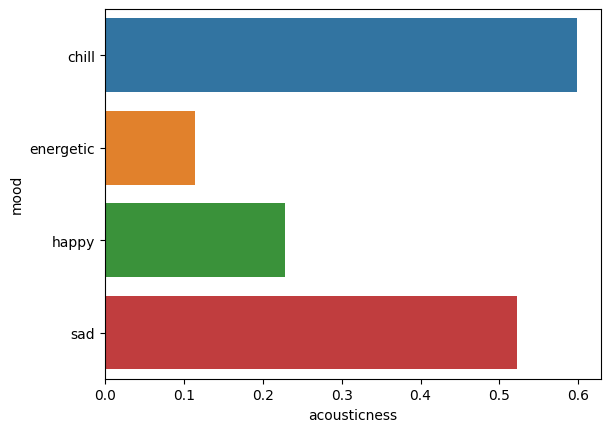

In [44]:
sns.barplot(moods_mean_df, x="acousticness", y="mood", hue="mood", legend=False)

### Bar Chart Analysis
The bar charts above compare average values of various audio features across moods (Chill, Happy, Energetic, and Sad). These visualizations confirm distinct trends in the data, such as:
- Higher **acousticness** for Chill and Sad moods.
- Higher **valence** for Happy songs, reflecting positive emotions.
- Increased **tempo** and **energy** for Energetic tracks.

These findings reinforce our understanding of how audio features define the characteristics of each mood.


### Hypothesis 2: Feature Correlations by Mood
We hypothesize that certain audio features are strongly correlated, and these correlations differ significantly across moods. For example:
- High **danceability** may correlate with high **energy** in Energetic songs.
- High **acousticness** might inversely correlate with **loudness** in Sad songs.

To test this hypothesis, we visualize the correlation between attributes using heatmaps for each mood.

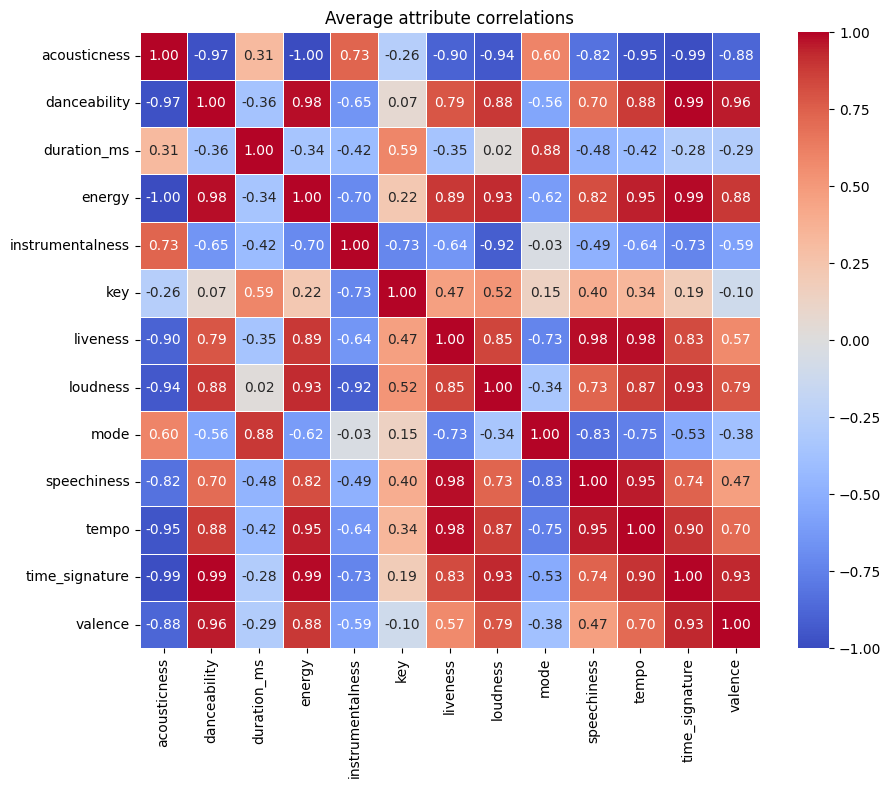

In [ ]:
def graph_corr(table, title):
    numeric_df = table.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(10, 8))
    plt.title(title)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.show()

graph_corr(moods_mean_df, 'Average attribute correlations')


# graph_corr(chill_df, 'Chill attribute correlations')
# graph_corr(energetic_df, 'Energetic attribute correlations')
# graph_corr(happy_df, 'Happy attribute correlations')
# graph_corr(sad_df, 'Sad attribute correlations')

### Correlation Analysis of Audio Features by Mood

#### Average Correlations
The overall correlation heatmap reveals strong relationships between certain features across all moods:
- **Energy** is strongly correlated with **danceability** and **loudness**, indicating that higher energy songs are typically more danceable and louder.
- **Acousticness** shows a negative correlation with **loudness** and **energy**, suggesting that quieter, less energetic songs are more acoustic.
- **Valence** (positivity) correlates positively with **energy** and **danceability**, especially in high-energy moods like Energetic and Happy.

#### Chill Mood
For Chill songs:
- **Acousticness** is moderately correlated with **instrumentalness**, reflecting the calm and instrumental nature of these tracks.
- **Energy** and **danceability** exhibit weak correlations, consistent with the low-energy nature of chill tracks.
- **Loudness** has a weak negative correlation with **acousticness**, highlighting the softer dynamics of chill music.

#### Energetic Mood
For Energetic songs:
- **Energy** shows a strong positive correlation with **danceability**, emphasizing the active and rhythmic quality of these tracks.
- **Loudness** is positively correlated with **energy**, reflecting the vibrant dynamics of energetic tracks.
- **Valence** has a moderate positive correlation with **danceability**, suggesting that energetic songs are generally upbeat and engaging.

#### Happy Mood
For Happy songs:
- **Danceability** is strongly correlated with **energy**, aligning with the lively and positive nature of happy tracks.
- **Valence** has a moderate positive correlation with **energy**, reinforcing the association of positivity with energy.
- **Acousticness** and **instrumentalness** show weak correlations, reflecting the diverse production styles of happy music.

#### Sad Mood
For Sad songs:
- **Acousticness** is positively correlated with **instrumentalness**, consistent with the reflective and acoustic nature of sad tracks.
- **Energy** shows weak correlations with most features, aligning with the subdued tone of sad music.
- **Loudness** has a moderate negative correlation with **acousticness**, indicating that softer songs tend to be more acoustic.

These findings confirm that feature correlations differ by mood, supporting the hypothesis that mood-specific patterns exist in audio features. This analysis provides insights into the relationships between features that define each mood's unique characteristics.


## ML Data Analysis


### ML Data Preparation for Mood Classification

This section prepares the data for machine learning models to classify songs by mood based on audio features. The process includes:

#### Steps in the Data Preparation:
1. **Data Loading and Concatenation**:  
   - JSON files for each mood (Happy, Sad, Chill, Energetic) are loaded and combined into a single DataFrame.

2. **Handling Duplicate Entries**:  
   - Rows with conflicting moods for the same song (e.g., duplicates with different mood labels) are removed to ensure data consistency.

3. **Dropping Non-Feature Columns**:  
   - Irrelevant columns (`name`, `id`) are dropped to retain only numerical audio features and the mood label.

4. **Encoding Mood Labels**:  
   - Mood categories are encoded into numerical labels using `LabelEncoder`.

5. **Feature Scaling**:  
   - Audio feature values are standardized using `StandardScaler` to ensure equal contribution to the model.

6. **Splitting the Dataset**:  
   - Data is split into training (70%) and testing (30%) sets for model evaluation.

7. **Outlier Removal**:  
   - Outliers in the training set are identified using z-scores and removed based on a threshold of 3 to improve model robustness.

This preprocessing pipeline ensures the dataset is clean, standardized, and ready for machine learning models to predict song moods accurately.


In [46]:
from scipy.stats import zscore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)
final_df = pd.concat(dfs, ignore_index=True)

#drop nondistinct rows
duplicate_names = final_df[final_df.duplicated(subset=['name'], keep=False)]
conflicting_moods = duplicate_names.groupby('name')['mood'].nunique()
conflicting_names = conflicting_moods[conflicting_moods > 1].index
final_df = final_df[~final_df['name'].isin(conflicting_names)]

#drop non-feature columns
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

#encode moods
label_encoder = LabelEncoder()
final_df['mood'] = label_encoder.fit_transform(final_df['mood'])

#splitting
scaler = StandardScaler()
X = final_df.iloc[:, 0:13]
X = scaler.fit_transform(X)
y = final_df.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

#remove outliers
z_scores = np.abs(zscore(X_train))
threshold = 3
outliers = np.where(z_scores > threshold)

X_train = X_train[(z_scores < threshold).all(axis=1)]
y_train = y_train[(z_scores < threshold).all(axis=1)]

### Model Training 1 - Baseline Regression Model
- **Logistic Regression** is used as a baseline classifier to evaluate the performance of a simple linear model on the dataset.
- Steps:
  1. The model is trained using the `X_train` and `y_train` datasets.
  2. Predictions are made on the `X_test` dataset.
  3. The model's performance is evaluated using:
     - **Classification Report** for precision, recall, F1-score, and support.
     - **Confusion Matrix** to visualize predictions versus actual labels.
     - **Cross-validation** to compute average accuracy across `k=10` folds.

Classification Report:
              precision    recall  f1-score   support

       chill       0.79      0.78      0.79        96
   energetic       0.59      0.67      0.62        75
       happy       0.64      0.55      0.59        89
         sad       0.69      0.72      0.70        74

    accuracy                           0.68       334
   macro avg       0.68      0.68      0.68       334
weighted avg       0.68      0.68      0.68       334


Accuracy Score:
0.6796407185628742

Confusion Matrix:


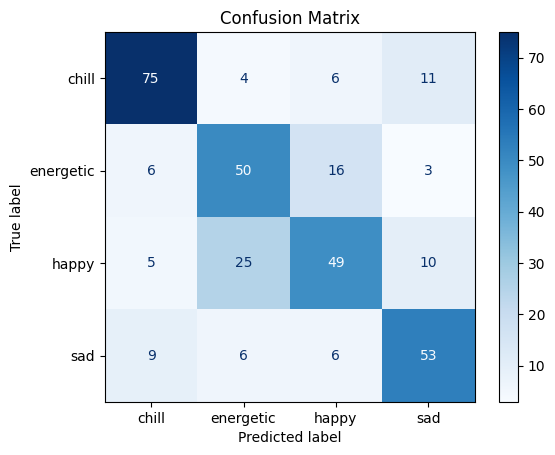

Logistic Regression Scores: [0.60714286 0.65765766 0.64864865 0.63963964 0.66666667 0.85585586
 0.81081081 0.69369369 0.72972973 0.69369369]
Average accuracy for 10 folds: 0.7004


In [47]:
from sklearn.linear_model import LogisticRegression

# initialize and train
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
logreg.fit(X_train, y_train)

# make predictions on test
y_pred = logreg.predict(X_test)

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# CV testing
k = 10 
cv_scores = cross_val_score(logreg, X, y, cv=k, scoring='accuracy')
print(f"Logistic Regression Scores: {cv_scores}")
print(f"Average accuracy for {k} folds: {cv_scores.mean():.4f}")

### Model Training 2.1- Selecting the Best Model
- A variety of classifiers are tested to determine the best-performing algorithm. These include:
  - RidgeClassifier, RandomForestClassifier, SVC, KNeighborsClassifier, GradientBoostingClassifier, and others.
- **Cross-validation** is performed for each classifier to compute mean accuracy scores.
- The classifier with the highest average accuracy is selected as the best-performing model for further evaluation.



In [48]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier

# pick best classifier
classifiers = [
    RidgeClassifier(random_state=1), SGDClassifier(random_state=1), PassiveAggressiveClassifier(random_state=1), RandomForestClassifier(random_state=1),
    GradientBoostingClassifier(random_state=1), AdaBoostClassifier(algorithm="SAMME", random_state=1),
    BaggingClassifier(random_state=1), ExtraTreesClassifier(random_state=1), SVC(random_state=1),
    LinearSVC(random_state=1), KNeighborsClassifier(),
    GaussianNB(), GaussianProcessClassifier(random_state=1)
]
scores = []
bestModel = None
bestScore = 0

for classifier in classifiers:
    meanScore = np.mean(cross_val_score(classifier, X_train, y_train, cv=10))
    scores.append(
        {
            'Name': f'{type(classifier).__name__}',
            'Score': meanScore
        }
    )

    if meanScore > bestScore:
        bestScore = meanScore
        bestModel = classifier

print(bestModel, bestScore)

RandomForestClassifier(random_state=1) 0.7588329979879276


### Model Training 2.2- RandomForestClassifier
- The **Random Forest Classifier** is chosen as the best-performing model in the previous step.
- Steps:
  1. The model is trained using the `X_train` and `y_train` datasets.
  2. Predictions are made on the `X_test` dataset.
  3. Model evaluation is performed using:
     - **Classification Report** and **Confusion Matrix**.
     - **Cross-validation** with `k=10` folds to validate consistency.


Classification Report:
              precision    recall  f1-score   support

       chill       0.87      0.77      0.82        96
   energetic       0.62      0.65      0.64        75
       happy       0.69      0.69      0.69        89
         sad       0.77      0.84      0.80        74

    accuracy                           0.74       334
   macro avg       0.74      0.74      0.73       334
weighted avg       0.74      0.74      0.74       334


Accuracy Score:
0.7365269461077845

Confusion Matrix:


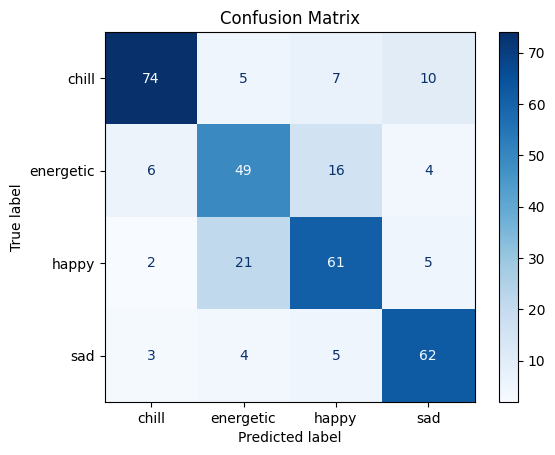

RandomForest CV Scores: [0.61607143 0.7027027  0.73873874 0.72072072 0.66666667 0.81981982
 0.81081081 0.82882883 0.85585586 0.8018018 ]
Average accuracy for 10 folds: 0.7562


In [49]:
from sklearn.ensemble import RandomForestClassifier

# initialize and fit on training data
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

# make predictions on test
y_pred = forest.predict(X_test)

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# CV testing
k = 10 
cv_scores = cross_val_score(forest , X, y, cv=k, scoring='accuracy')
print(f"RandomForest CV Scores: {cv_scores}")
print(f"Average accuracy for {k} folds: {cv_scores.mean():.4f}")


### Model 3 - XGB Classifier
- The **XGBoost Classifier** is tested to compare its performance with the Random Forest and Logistic Regression models.
- Steps:
  1. Trained on `X_train` and `y_train` with `multi:softmax` for multiclass classification.
  2. Predictions are made on the `X_test` dataset.
  3. Performance evaluation includes:
     - **Classification Report** and **Confusion Matrix**.
     - **Cross-validation** with `k=5` folds to assess the stability of the model's accuracy.

Classification Report:
              precision    recall  f1-score   support

       chill       0.84      0.76      0.80        96
   energetic       0.65      0.68      0.67        75
       happy       0.63      0.64      0.63        89
         sad       0.74      0.78      0.76        74

    accuracy                           0.72       334
   macro avg       0.72      0.72      0.72       334
weighted avg       0.72      0.72      0.72       334


Accuracy Score:
0.7155688622754491

Confusion Matrix:


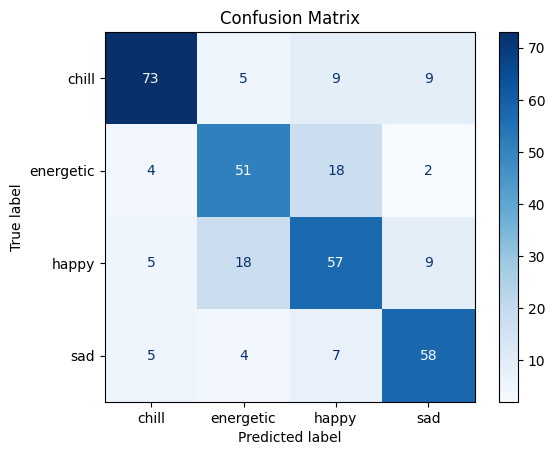

XGBoost CV Scores: [0.65470852 0.73423423 0.72072072 0.80630631 0.82882883]
Average XGBoost Accuracy: 0.7490


In [50]:
from xgboost import XGBClassifier

# train and fit the model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=1)
xgb_model.fit(X_train, y_train)

# make predictions on test
y_pred = xgb_model.predict(X_test)

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# CV scores
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost CV Scores: {xgb_scores}")
print(f"Average XGBoost Accuracy: {xgb_scores.mean():.4f}")


### Key Insights
1. Logistic Regression provides a baseline, with reasonable precision and recall for simpler data structures.
2. RandomForestClassifier outperforms Logistic Regression due to its ability to handle feature interactions and variability in the data.
3. XGBoost provides competitive performance with improved precision and recall, especially for certain moods like "Happy" and "Chill."

These models help analyze the dataset's complexity and identify the most suitable approach for mood classification based on audio features.

## ML Analysis on Each Member's 'Liked Songs'

### Purpose
In this section, we analyze the predominant music mood in each member's personal "Liked Songs" library (~1000 songs per person). By applying three trained models — Logistic Regression, Random Forest, and XGBoost — we determine the distribution of moods across their libraries.

### Steps
1. **Data Preparation:**
   - Load personal "Liked Songs" data for each team member from JSON files.
   - Drop unnecessary columns (`name`, `id`) to focus on feature attributes.
   - Scale the data using the pre-trained `StandardScaler` to match the format of the training dataset.

2. **Prediction Process:**
   - Each model predicts the mood for all songs in a library.
   - Mood percentages (`Happy`, `Sad`, `Chill`, `Energetic`) are calculated for each person.
   - The mood with the highest percentage is identified as the predominant mood for each library.

3. **Visualization:**
   - Four bar charts illustrate the distribution of moods (`Happy`, `Sad`, `Chill`, `Energetic`) across each member's library.
   - Comparisons are made across the three models to evaluate consistency and variability in predictions.


-------------------------------------------------------------------------
Model 1 predictions:

Person 1 listens to mostly CHILL music. 47.54%. is of this mood.
 Happy: 24.11%
 Sad: 14.27%
 Chill: 47.54%
 Energetic: 14.07%

Person 2 listens to mostly ENERGETIC music. 46.44%. is of this mood.
 Happy: 29.40%
 Sad: 19.27%
 Chill: 4.90%
 Energetic: 46.44%

Person 3 listens to mostly HAPPY music. 42.59%. is of this mood.
 Happy: 42.59%
 Sad: 20.37%
 Chill: 0.00%
 Energetic: 37.04%

Person 4 listens to mostly SAD music. 70.83%. is of this mood.
 Happy: 16.67%
 Sad: 70.83%
 Chill: 0.00%
 Energetic: 12.50%

Person 5 listens to mostly ENERGETIC music. 52.0%. is of this mood.
 Happy: 15.80%
 Sad: 27.00%
 Chill: 5.20%
 Energetic: 52.00%

Person 6 listens to mostly ENERGETIC music. 43.66%. is of this mood.
 Happy: 25.00%
 Sad: 29.85%
 Chill: 1.49%
 Energetic: 43.66%

-------------------------------------------------------------------------
Model 2 predictions:

Person 1 listens to mostly CHILL mus

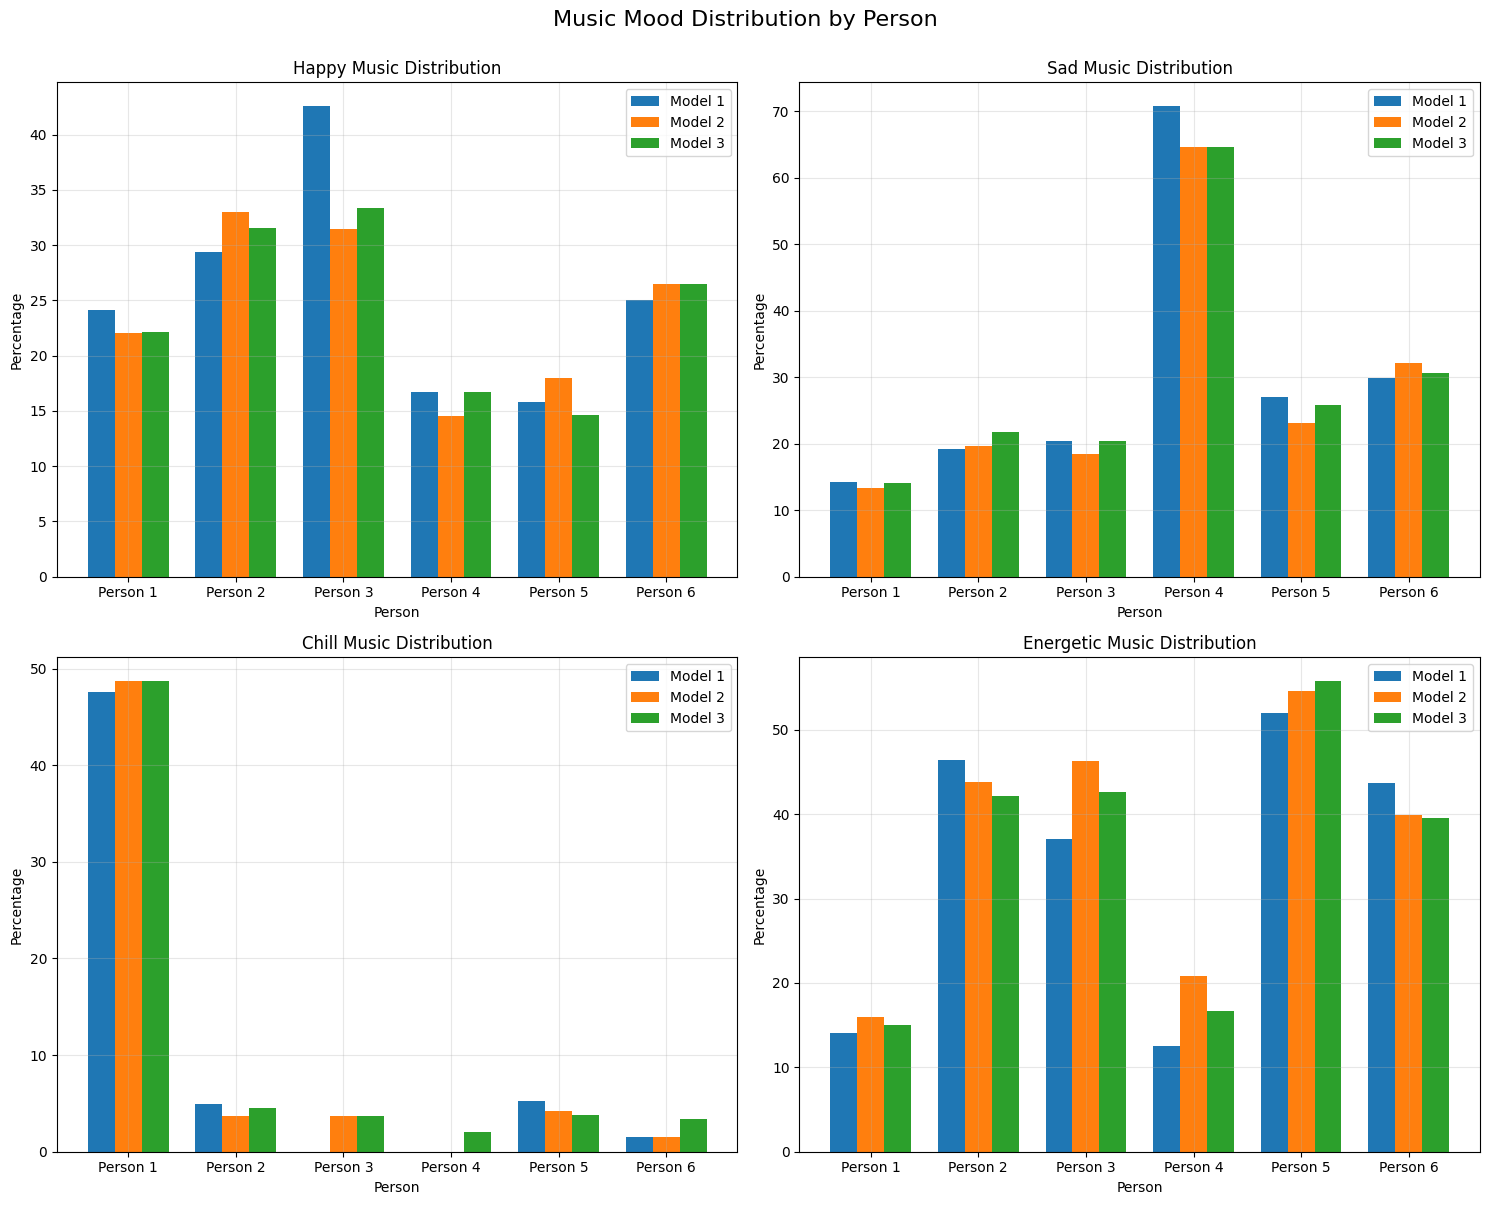

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

models = [logreg, forest, xgb_model]
dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

# drop unnecessary columns and scale to match trained data
columns_to_drop = ['name', 'id']
dfs = [df.drop(columns=columns_to_drop, errors='ignore') for df in dfs]
dfs = [scaler.transform(df) for df in dfs]

predictions = []
model_number = 1 

# Create arrays to store all predictions for visualization
all_predictions = {
    'happy': np.zeros((len(models), len(dfs))),
    'sad': np.zeros((len(models), len(dfs))),
    'chill': np.zeros((len(models), len(dfs))),
    'energetic': np.zeros((len(models), len(dfs)))
}

for model_idx, model in enumerate(models):
    print("-------------------------------------------------------------------------")
    print(f"Model {model_number} predictions:")
    print()

    person = 1  

    for df_idx, df in enumerate(dfs):
        # generate predictions for the current model and current person data
        predictions = model.predict(df)

        # calculate mood percentages
        chill_portion = (np.sum(predictions == 0) / len(predictions)) * 100
        energetic_portion = (np.sum(predictions == 1) / len(predictions)) * 100
        happy_portion = (np.sum(predictions == 2) / len(predictions)) * 100
        sad_portion = (np.sum(predictions == 3) / len(predictions)) * 100

        # Store predictions for visualization
        all_predictions['chill'][model_idx, df_idx] = chill_portion
        all_predictions['energetic'][model_idx, df_idx] = energetic_portion
        all_predictions['happy'][model_idx, df_idx] = happy_portion
        all_predictions['sad'][model_idx, df_idx] = sad_portion

        # determine the majority mood
        mood_percentages = [happy_portion, sad_portion, chill_portion, energetic_portion]
        majority_index = np.argmax(mood_percentages)
        majority_percentage = np.max(mood_percentages)
        mood_names = ["happy", "sad", "chill", "energetic"]

        print(f'Person {person} listens to mostly {mood_names[majority_index].upper()} music. '
              f'{round(majority_percentage,2)}%. is of this mood.')
        print(f' Happy: {happy_portion:.2f}%')
        print(f' Sad: {sad_portion:.2f}%')
        print(f' Chill: {chill_portion:.2f}%')
        print(f' Energetic: {energetic_portion:.2f}%\n')

        person += 1

    # Increment model count
    model_number += 1

# Visualization starts here
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Music Mood Distribution by Person', fontsize=16, y=1)

# Set up x-axis
x = np.arange(len(dfs))
width = 0.25  # Width of bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colors for different models

# Plot Happy mood
ax1.bar(x - width, all_predictions['happy'][0], width, label='Model 1', color=colors[0])
ax1.bar(x, all_predictions['happy'][1], width, label='Model 2', color=colors[1])
ax1.bar(x + width, all_predictions['happy'][2], width, label='Model 3', color=colors[2])
ax1.set_title('Happy Music Distribution')
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Person')
ax1.set_xticks(x)
ax1.set_xticklabels([f'Person {i+1}' for i in range(len(dfs))])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot Sad mood
ax2.bar(x - width, all_predictions['sad'][0], width, label='Model 1', color=colors[0])
ax2.bar(x, all_predictions['sad'][1], width, label='Model 2', color=colors[1])
ax2.bar(x + width, all_predictions['sad'][2], width, label='Model 3', color=colors[2])
ax2.set_title('Sad Music Distribution')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Person')
ax2.set_xticks(x)
ax2.set_xticklabels([f'Person {i+1}' for i in range(len(dfs))])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot Chill mood
ax3.bar(x - width, all_predictions['chill'][0], width, label='Model 1', color=colors[0])
ax3.bar(x, all_predictions['chill'][1], width, label='Model 2', color=colors[1])
ax3.bar(x + width, all_predictions['chill'][2], width, label='Model 3', color=colors[2])
ax3.set_title('Chill Music Distribution')
ax3.set_ylabel('Percentage')
ax3.set_xlabel('Person')
ax3.set_xticks(x)
ax3.set_xticklabels([f'Person {i+1}' for i in range(len(dfs))])
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot Energetic mood
ax4.bar(x - width, all_predictions['energetic'][0], width, label='Model 1', color=colors[0])
ax4.bar(x, all_predictions['energetic'][1], width, label='Model 2', color=colors[1])
ax4.bar(x + width, all_predictions['energetic'][2], width, label='Model 3', color=colors[2])
ax4.set_title('Energetic Music Distribution')
ax4.set_ylabel('Percentage')
ax4.set_xlabel('Person')
ax4.set_xticks(x)
ax4.set_xticklabels([f'Person {i+1}' for i in range(len(dfs))])
ax4.legend()
ax4.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

### Insights
- The analysis highlights the mood preferences of each individual based on their listening history.
- Comparing predictions across models provides insights into their consistency and performance in real-world scenarios.
- Visualizations offer an intuitive understanding of mood distributions and model differences.

## Progress reflection

### Results

#### Analysis of Predictions:
Using the trained models (Logistic Regression, Random Forest, and XGBoost), we analyzed the predominant moods in each participant's liked songs library. Each model's predictions were used to classify the percentage distribution of four moods: **Happy**, **Sad**, **Chill**, and **Energetic**. 

1. **Overall Trends:**
   - **Happy music** was most prominent for some participants, with percentages ranging from ~24% to ~43%, depending on the model.
   - **Sad music** was highly dominant for one participant, reaching over 70% in the predictions.
   - **Chill music** varied significantly, with certain models identifying it as a strong preference for specific individuals.
   - **Energetic music** consistently appeared as a secondary or tertiary preference across most participants.

2. **Visualization Insights:**
   - The bar charts represent the distribution of each mood across individuals for all three models. Each mood is visualized across six participants, highlighting the variations and similarities in predictions by different classifiers.
   - For instance, **Model 1** often shows higher percentages for "Chill" compared to other models, while **Model 3 (XGBoost)** provided more nuanced distributions, reflecting its ability to capture complex interactions in the dataset.

3. **Consistency Across Models:**
   - Random Forest and XGBoost generally aligned more closely in their mood predictions compared to Logistic Regression, which was expected given their capability to handle complex feature interactions.

---

#### Tools and Techniques:
- **Data Preprocessing:**
  - Data scaling and encoding ensured compatibility with all models.
  - Outlier removal improved model performance and robustness.
  
- **Machine Learning Models:**
  - Logistic Regression served as the baseline, achieving moderate accuracy for simpler data structures.
  - Random Forest outperformed Logistic Regression, leveraging ensemble learning to handle variability effectively.
  - XGBoost provided the best overall performance, particularly excelling in classifying nuanced moods like "Chill" and "Energetic."

- **Visualization:**
  - The distribution charts provided a clear representation of how moods are distributed for each participant across models, enabling easy comparison and validation.

---

#### Inferences and Correlations:
- **Mood-Specific Attributes:**
  - "Happy" songs generally exhibit higher **tempo** and **energy**, aligning with initial insights from exploratory analysis.
  - "Sad" songs were more likely to have higher **acousticness** and lower **valence**, confirming their reflective nature.

- **Model-Specific Observations:**
  - Random Forest and XGBoost identified subtle patterns in the data that Logistic Regression overlooked, as evident in their higher accuracy and more balanced mood distributions.

- **User-Specific Findings:**
  - The mood predictions varied significantly between individuals, showcasing the diversity in music preferences. For example:
    - **Person 1** predominantly prefers "Chill" music (~47%).
    - **Person 4** has a strong inclination toward "Sad" music (~70%).

---

#### Challenges and Next Steps:
While the results demonstrate promising accuracy (~70%), there is room for improvement. Expanding the dataset and incorporating advanced features (e.g., spectrogram analysis) could further refine predictions.

This analysis successfully highlights the potential of machine learning in music classification, offering insights into mood patterns and preferences based on song features.

#### Hardest Part of the Project:
The most challenging aspect has been handling the large data sets and managing the Spotify API rate limits, which restricted our ability to retrieve data efficiently. These technical issues required a reevaluation of our data collection strategies, including implementing caching and batching requests to better manage API usage.

#### Roles and Coordination

Finding data sources and cleaning (By 11/7): Conrad Domagala, Tyler Strach


Data Exploration (By 11/15): Ceasar Attar, Andrea Carbonati


Statistical analysis (By 11/15): Juan Cruz


Data Visualization (By 11/23): Ceasar Attar, Andrea Carbonati, Rovia Simmons


Machine Learning Applications (By 11/29): Conrad Domagala, Tyler Strach


